In [1]:
import json
from lib.pipeline import Pipeline
from lib.disable_logger import DisableLogger
import torch
GPU = 0   
pipeline = Pipeline(
    model='lm-gearnet',
    dataset='atpbind3d',
    gpus=[GPU],
    model_kwargs={
        'gpu': GPU,
        'gearnet_hidden_dim_size': 512,
        'gearnet_hidden_dim_count': 4,
        'bert_freeze': False,
        'bert_freeze_layer_count': 29,
    },
    bce_weight=1.0,
)
    
state_dict = torch.load('ResidueType_lmg_4_512_0.57268.pth', map_location=f'cuda:{GPU}')
pipeline.model.gearnet.load_state_dict(state_dict)


/home/jaechanlee/miniconda3/envs/jc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


get dataset atpbind3d
Split num:  [337, 41, 41]
train samples: 337, valid samples: 41, test samples: 41


<All keys matched successfully>

In [3]:
result = pipeline.train_until_fit()

result

In [15]:
%matplotlib inline
def main(epoch):
    pipeline = Pipeline(
        model='lm-gearnet',
        dataset='atpbind3d',
        gpus=[GPU],
        model_kwargs={
            'gpu': GPU,
            'gearnet_hidden_dim_size': 512,
            'gearnet_hidden_dim_count': 4,
            'bert_freeze': False,
            'bert_freeze_layer_count': 29,
        },
        bce_weight=1.0,
    )
        
    state_dict = torch.load('ResidueType_lmg_4_512_0.57268.pth', map_location=f'cuda:{GPU}')
    pipeline.model.gearnet.load_state_dict(state_dict)

    train_losses = []
    valid_losses = []
    for _ in range(epoch):
        pipeline.train(num_epoch=1)
        train_losses.append(pipeline.get_last_bce())
        valid_losses.append(pipeline.calculate_valid_loss())
        print(train_losses[-1], valid_losses[-1])
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    x = list(range(1, len(train_losses)+1))
    plt.plot(x, train_losses, '-o', label='Training loss')
    plt.plot(x, valid_losses, '-o', label='Validation loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

14:31:14   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:31:14   Epoch 0 begin
14:31:14   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:31:14   binary cross entropy: 0.68808
14:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:31:46   Epoch 0 end
14:31:46   duration: 32.75 secs
14:31:46   speed: 10.29 batch / sec
14:31:46   ETA: 0.00 secs
14:31:46   max GPU memory: 5782.8 MiB
14:31:46   ------------------------------
14:31:46   average binary cross entropy: 0.159654
0.15965375745563992 0.12681848882901958
14:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:31:50   Epoch 1 begin
14:32:23   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:32:23   Epoch 1 end
14:32:23   duration: 36.11 secs
14:32:23   speed: 9.33 batch / sec
14:32:23   ETA: 0.00 secs
14:32:23   max GPU memory: 5782.8 MiB
14:32:23   ------------------------------
14:32:23   average binary cross entropy: 0.106402
0.10640204202615897 0.14164543533186633
14:32:26   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:32:26   Epoch 2 begin
14:32:59   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:32:59   Epoch 

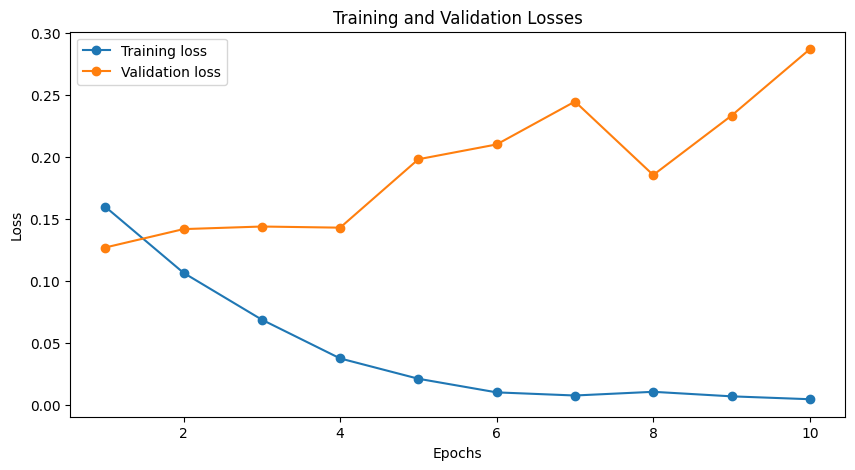

In [14]:
main(5)

14:42:20   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:42:20   Epoch 0 begin
14:42:20   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:42:20   binary cross entropy: 0.786413
14:42:52   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:42:52   Epoch 0 end
14:42:52   duration: 32.50 secs
14:42:52   speed: 10.37 batch / sec
14:42:52   ETA: 0.00 secs
14:42:52   max GPU memory: 5782.8 MiB
14:42:52   ------------------------------
14:42:52   average binary cross entropy: 0.161427
0.16142700120353468 0.1120529226254581
14:42:55   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:42:55   Epoch 1 begin
14:43:28   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:43:28   Epoch 1 end
14:43:28   duration: 36.05 secs
14:43:28   speed: 9.35 batch / sec
14:43:28   ETA: 0.00 secs
14:43:28   max GPU memory: 5782.8 MiB
14:43:28   ------------------------------
14:43:28   average binary cross entropy: 0.107567
0.10756673467641238 0.13194628563573266
14:43:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:43:31   Epoch 2 begin
14:44:04   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
14:44:04   Epoch 

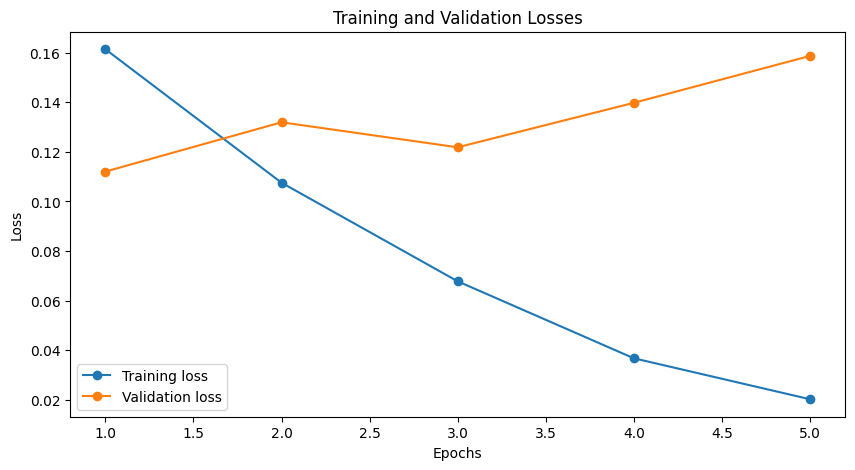

In [16]:
main(5)

15:15:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
15:15:54   Epoch 0 begin
15:15:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
15:15:54   binary cross entropy: 0.667691
15:16:26   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
15:16:26   Epoch 0 end
15:16:26   duration: 32.34 secs
15:16:26   speed: 10.42 batch / sec
15:16:26   ETA: 0.00 secs
15:16:26   max GPU memory: 5782.8 MiB
15:16:26   ------------------------------
15:16:26   average binary cross entropy: 0.159905
0.15990474471927396 0.11528644921604499
15:16:29   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
15:16:29   Epoch 1 begin
15:17:02   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
15:17:02   Epoch 1 end
15:17:02   duration: 35.58 secs
15:17:02   speed: 9.47 batch / sec
15:17:02   ETA: 0.00 secs
15:17:02   max GPU memory: 5782.8 MiB
15:17:02   ------------------------------
15:17:02   average binary cross entropy: 0.110413
0.11041281348542042 0.1269346704095186
15:17:05   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
15:17:05   Epoch 2 begin
15:17:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
15:17:38   Epoch 

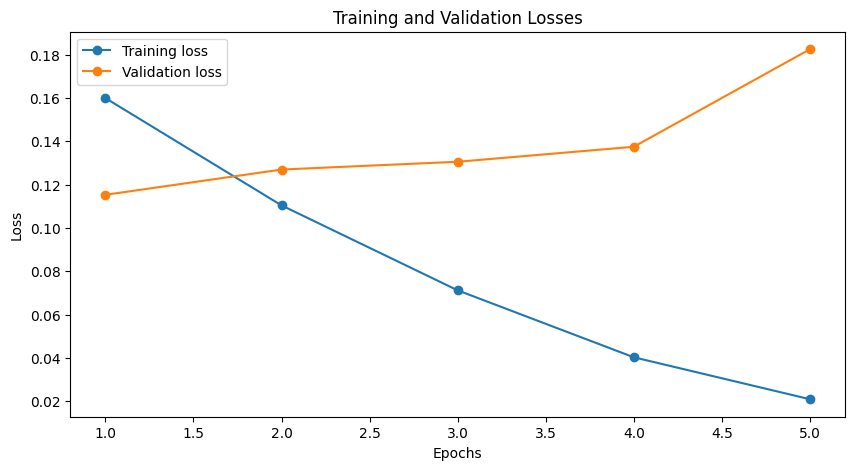

In [17]:
main(5)